# Linear Regression With Single Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/auto_insurance_sweden.csv")

data.head()

,number of claims,total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
data.shape

(63, 2)

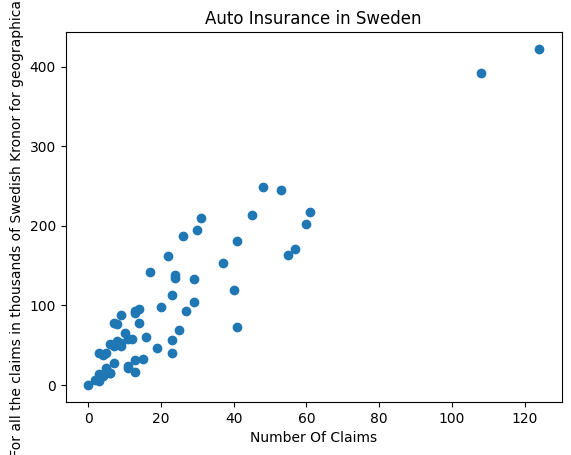

In [4]:
# print(plt.style.available)
# plt.style.use("fivethirtyeight")
plt.style.use("default")

plt.scatter(data["number of claims"], data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"])

plt.title("Auto Insurance in Sweden")
plt.xlabel("Number Of Claims")
plt.ylabel("Total Payment For all the claims in thousands of Swedish Kronor for geographical zones in Sweden")

plt.show()

In [5]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

In [6]:
training_data.head()

,number of claims,total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden
29,4,38.1
0,108,392.5
13,23,39.6
7,14,77.5
46,11,21.3


In [7]:
training_data.shape

(50, 2)

In [8]:
testing_data.head()

,number of claims,total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden
4,40,119.4
5,57,170.9
8,45,214.0
15,2,6.6
23,3,13.2


In [9]:
testing_data.shape

(13, 2)

In [10]:
x_train = training_data["number of claims"]
x_test = testing_data["number of claims"]

In [11]:
x_train.head()

29      4
0     108
13     23
7      14
46     11
Name: number of claims, dtype: int64

In [12]:
x_test.head()

4     40
5     57
8     45
15     2
23     3
Name: number of claims, dtype: int64

In [13]:
y_train = training_data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"]
y_test = testing_data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"]

In [14]:
y_train.head()

29     38.1
0     392.5
13     39.6
7      77.5
46     21.3
Name: total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden, dtype: float64

In [15]:
y_test.head()

4     119.4
5     170.9
8     214.0
15      6.6
23     13.2
Name: total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden, dtype: float64

## Model 

In [16]:
class LinearRegression:
    
    def __init__(self, x_train, y_train, learning_rate=0.00008, iteration=1000):
        self.learning_rate = learning_rate 
        self.iteration = iteration
        self.x_train = x_train
        self.y_train = y_train
        self.theta = np.zeros((len(self.x_train.shape) + 1, 1)) # theta is array n, x
        self.m = y_train.size # m is size of all data
         
        
    def fit(self):
        theta_list = []
        cost_list = []
        
        x = np.vstack((np.ones(self.x_train.size), self.x_train)).T # add one column one value 
        y = self.y_train.to_numpy().reshape(self.y_train.size, 1) # reshape for 2, 1
        
        
        
        for _ in range(self.iteration):
            theta_list.append(self.theta)
            y_pred = np.dot(x, self.theta)
            
            cost = (1 / (2 * self.m) * np.sum(np.square(y_pred - y)))
            
            d_theta = (1 / self.m) * np.dot(x.T, y_pred - y)
            
            self.theta = self.theta - self.learning_rate * d_theta
            
            cost_list.append(cost)
            
        return self.theta, theta_list, cost_list
            
        
    def predict(self, x):
        x = np.vstack((np.ones(x.size), x)).T
        predict_x = [self._predict(x_test) for x_test in x]
        return np.array(predict_x)
    
    def _predict(self, x):
        return np.dot(x, self.theta)
    
    def cost(self, y_true, y_pred):
        return (1 / (2 * y_true.size) * np.sum(np.square(y_pred - y_true)))
#         return np.sqrt((np.sum(y_true - y_pred) ** 2) /  len(y_true))

In [17]:
model = LinearRegression(x_test, y_test)

theta, theta_list, cost_list = model.fit()

# print(f"Theta: {theta}\n")
# print(f"Theta List:\n{theta_list}\n")
# print(f"Cost List:\n{cost_list}\n")

In [18]:
predictions = model.predict(x_test)
predictions

array([[148.64476649],
       [211.37269598],
       [167.09415751],
       [  8.42939469],
       [ 12.1192729 ],
       [ 26.87878572],
       [ 15.8091511 ],
       [ 26.87878572],
       [ 93.29659341],
       [203.99293957],
       [ 63.77756777],
       [ 30.56866392],
       [ 96.98647161]])

## Model Accuracy

In [19]:
y_true = y_test.to_numpy().reshape(y_test.size, 1)




accu = model.cost(y_true, predictions)
print("Cost Value:", accu)
print(y_true)
print(predictions)

Cost Value: 942.6448380775107
[[119.4]
 [170.9]
 [214. ]
 [  6.6]
 [ 13.2]
 [ 77.5]
 [ 11.8]
 [ 27.9]
 [ 69.2]
 [162.8]
 [142.1]
 [ 55.6]
 [187.5]]
[[148.64476649]
 [211.37269598]
 [167.09415751]
 [  8.42939469]
 [ 12.1192729 ]
 [ 26.87878572]
 [ 15.8091511 ]
 [ 26.87878572]
 [ 93.29659341]
 [203.99293957]
 [ 63.77756777]
 [ 30.56866392]
 [ 96.98647161]]


## Cost Function

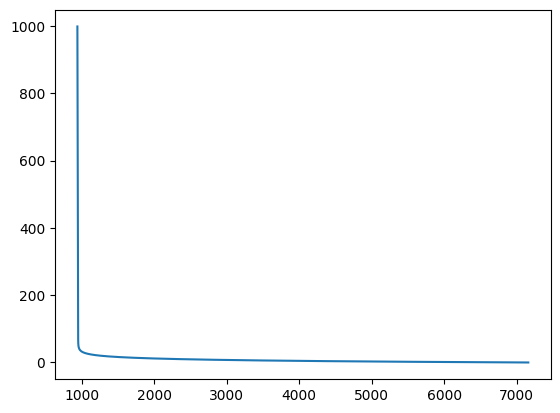

In [20]:
indexs_x = np.arange(0, 1000) # LinearRegression.iteration

plt.plot(cost_list, indexs_x)
plt.show()

## Prediction Linear

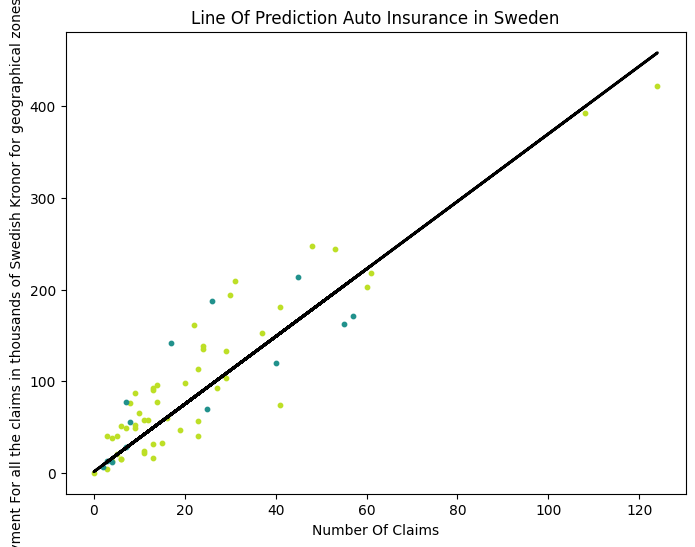

In [21]:
x, y = data["number of claims"], data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"]

y_pred_line = model.predict(x)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)
plt.plot(x, y_pred_line, color="black", linewidth=2, label="Prediction")

plt.title("Line Of Prediction Auto Insurance in Sweden")
plt.xlabel("Number Of Claims")
plt.ylabel("Total Payment For all the claims in thousands of Swedish Kronor for geographical zones in Sweden")
plt.show()